In [18]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.optimize

####1)Fibbonacci search

For 1 Dimension optimization we can actually use something similar to bisection to find the extremum. The method is called Fibbonacci Search/or sometimes golden ratio search.

The idea goes like the following,

1. We bound the function and we assume that function is *unimodal* (sometimes it's called quasiconvex). It is just a fancy word for *having 1 extremum* with in the interval we care.

2. Then we pick two additional points in the interval. (This is what makes it different from bisection)

3. From the values of the boundaries and the two additional point we can figure out the new boundary

Let us do an example. Our starting bounds are at $a$ and $b$.

We then have two test points $l$ and $r$ such that it is between the two bound and $c<d$. Specifically,
$$a < l < r < b$$
In this case, we pick $l$ and $r$ such that the space is divided in to 3 pieces equally. (This is actually suboptimal.)

The new bounds will be choosen from the  two interval $(a,r)$ or $(l, b)$. Yes, the two intervals ovelap. This can be done by comparing the value of $f(l)$ and $f(r)$. You will have to figure out the rule for bound update.

The new bound we get will be smaller than the former bound. This means that if we keep updating the bound we can bound the maximum quite accurately.

Yes, there are some of missing pieces in the instruction. By now you should be able to fill those in yourself.

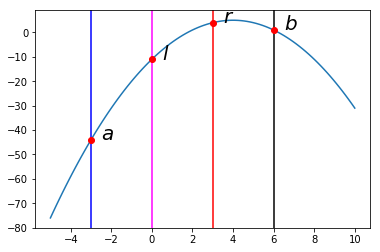

In [5]:
def f(x):
    return -(x-4)**2 +5

xs = np.linspace(-5,10,100)
ys = f(xs)
plt.plot(xs,ys)
#plt.ylim(-30,10)
xx = [-3,0,3,6]
colors = ['blue', 'magenta', 'red','black']
shift = 0.5
for x,c,i in zip(xx,colors,['a','l','r','b']):
    plt.axvline(x,color=c)
    plt.plot(x,f(x),'or')
    plt.text(x+shift,f(x),r'$%s$'%(i),size=20)

####1.1) Task 1 Maximum
Find the location of the maximum for the given function using Fibbonacci search described above. Pick appropriate initial bound.

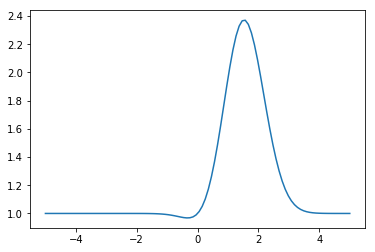

In [6]:
def ff(x):
    return math.exp(-(x-1.2)**2)*x + 1
xs = np.linspace(-5,5,100)
ys = [ff(xx) for xx in xs]
plt.plot(xs,ys)

1.5273389058301254


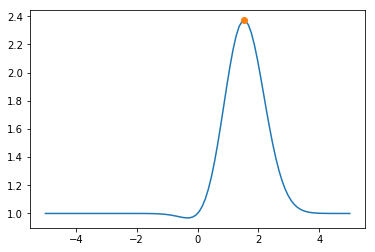

In [7]:
'''
The idea of fibonacci search is to keep the larger functional value between f(l) vs f(r) and it opposite endpoint.
Then update new bound [a,b]. Final answer is f((a+b)/2).  
'''
def FibSearch(f,a,b,c):   
    d = (b-a)/3.
    l = a+d
    r = b-d
    if b-a < c:
        return (a+b)/2 
    else:
        if f(l) > f(r):            
            return FibSearch(f,a,r,c)
        else:           
            return FibSearch(f,l,b,c)
a = FibSearch(ff,-2,3.,0.001)
print(a)
plt.plot(xs,ys)
plt.plot(a,ff(a),'o')

In [8]:
# def FibSearch(f,a,b,c):     #c is precision 
#     l = a+(b-a)/3
#     r = b-(b-a)/3
#     i = 0
#     while(c < (b-a)):
#         i+=1
#         if f(l) > f(r):    # new interval [a,r]
#             b = r
#             r = l
#             l = a+(b-a)/3
#         else:              # new interval [l,b]
#             a = l
#             l = r
#             r = b-(b-a)/3
#     return a, b, i 

# a, b, i = FibSearch(ff,-4,4,0.0001)
# print(a,b, i)
# mid = (a+b)/2
# print(mid)
# plt.plot(xs,ys)
# plt.grid()
# plt.plot(mid,ff(mid),'.')

####1.2) Task 2 Minimum
Find the location of the minimum for the given function using Fibbonacci search described above. Pick appropriate initial bound.

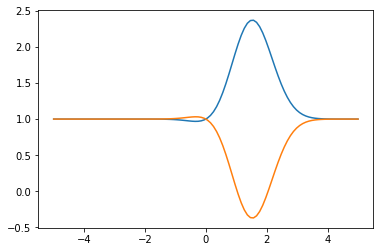

In [9]:
def f(x):
    return math.exp(-(x-1.2)**2)*x + 1

def nf(x):
    return -math.exp(-(x-1.2)**2)*x + 1
xs = np.linspace(-5,5,100)
ys = [f(xx) for xx in xs]
ss = [nf(xx) for xx in xs]
plt.plot(xs,ys)
plt.plot(xs,ss)

-0.32741556741612565


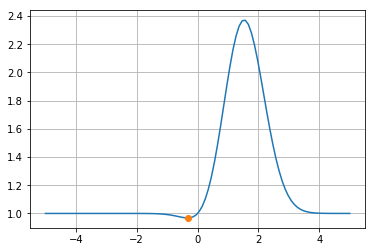

In [10]:
a = FibSearch(nf,-2,3.,0.001)
print(a)
plt.plot(xs,ys)
plt.grid()
plt.plot(a,ff(a),'o')

####1.3) The name Fibbonacci.  Read along.
You may wonder why this method is called Fibbonacci search or Golden ratio search. This has to do about how you pick the two points in between.


Here is the deal. Normally you need to recalculate *both* $l$ and $r$ in and thus $f(l)$ and $f(r)$ in each iteration. This is quite expensive and can be avoid by picking special value of $r$ and $l$.

<img src="Chapra.png" width="300px">
(Image from Numericals Method for Engineer by Chapra)

The idea is we hope that one of $r$ or $l$ can be reused as we move the bound.

From the picture above, we can see that we can reuse $l$ from the first iteration as $r$ of the second iteration if

$$\frac{l_1}{l_0} = \frac{l_2}{l_1}$$

1. The left ratio is the ratio of $r$ or the first iteration over the total length of the first iteration.
2. The right ratio is the ratio of $r$ of the second iteration over the total length of the second iteration.

We also have the condition that

$$l_0 = l_1 + l_2$$


Combining the two equations we have

$$ \frac{l_1}{l_2+l_1} = \frac{l_2}{l_1}$$

Let $R = \frac{l_2}{l_1}$

Then we have

$$R^2 + R -1 = 0$$

Your job is to find value of $R$. You will get a number that look very familiar. You could implement it with this ratio and reuse the value for fun but don't bother. I have never seen anyone use this method. Just find $R$.

$$R =\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

In [11]:
a = 1
b = 1
c = -1 
print ('R =',(-b+(b**2-(4*a*c))**(0.5))/(2*a))

R = 0.6180339887498949


####2) Gradient Descent

Find the minimum of the following function using gradient descent.

$$ f(x,y) = (a-x)^2 + b (y-x^2)^2$$

with $a=1.11$ and $b=50$. Pick appropriate starting point.

[ 1.00462061  1.00842117]


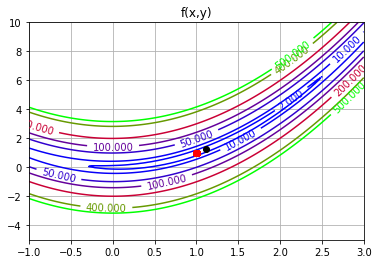

In [118]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

a = 1.11
b = 50.
def f(x,y):
    return (a-x)**2+b*(y-x**2)**2
def gradientf(v):
    x, y = v
    return np.array([-2*(a-x)-4*b*x*(y-x**2), 2*b*(y - x**2)])

nx = 200
ny = 200
x = np.linspace(-1,3,nx)
y = np.linspace(-5,10,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

v = (1.,1.)
lmd = 0.001
for i in range(100):
    v = v-lmd*(gradientf(v))
    plt.plot(v[0],v[1],'o',color='red')

print(v)

plt.plot(1.10999821,1.23209595,'o',color='black')

In [120]:
a = 1.11
b = 50.
def cost(w):
    x, y = w 
    return (a-x)**2+b*(y-x**2)**2

res = scipy.optimize.minimize(cost,[1.,1.])  
x, y = res.x 
print(res.x)

[ 1.10999821  1.23209595]


####3) Smiley (This is not easy)
Use the method we learned in class and draw a separating line of the form

$$x_2 = ax_1^2 + bx_1 + c$$

between the eyes and the mouth of the smiley. You should get a curve not a straightline. $x_1$ is the first column or `data` and $x_2$ is the second column of `data`. `classes` contains the integer indicating whether it's a mouth(0) or eyes(1).

Your answer should be something similar to the green line shown below.

The trick to this is to really understand what we did in class and use this hint:

Hint: Use $$\vec{w} \cdot \vec{x} =  [c, a, b, 1] \cdot [1, x_1, x_1^2, x_2]$$

You may use scipy.optimize.minimize.

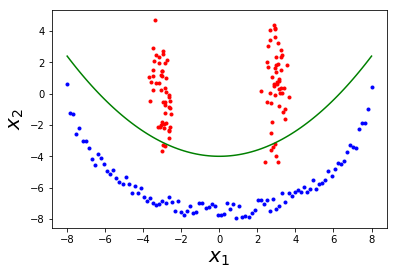

In [108]:
np.random.seed(20)
n = 50
mean = [-3, 0]
cov = [[0.1, -0.5], [-0.5, 5]]
lex, ley = np.random.multivariate_normal(mean, cov, n).T

mean = [3, 0]
cov = [[0.1, 0], [0, 5]]
rex, rey = np.random.multivariate_normal(mean, cov, n).T

mx = np.linspace(-8,8,2*n)
my = -np.sqrt(8**2 - mx**2) + np.random.rand(100)


data = np.zeros((4*n,2))
data[:50,0], data[:50,1] = lex, ley
data[50:100,0], data[50:100,1] = rex, rey
data[100:,0], data[100:,1] = mx, my

classes = np.zeros(4*n)
classes[:100] = 1
classes[100:] = 0

plt.plot(data[classes==1,0], data[classes==1,1],'.r')
plt.plot(data[classes==0,0], data[classes==0,1],'.b')
plt.xlabel(r"$x_1$",size=20)
plt.ylabel(r"$x_2$",size=20)


my2 = 0.1*mx**2 -4
plt.plot(mx,my2,'g')


In [15]:
#this is how you make a padded array pdx = [1,x1,x1^2,x2]
nr, nc = data.shape
pdx = np.zeros((nr,nc+2))
pdx[:,0] =  1.0
pdx[:,1] = data[:,0]
pdx[:,2] = (data[:,0])**2
pdx[:,3] = data[:,1]
# print(pdx)
# print(data.shape)

In [48]:
# print(data)

[ 1.  1. -2.]
[ 1.00000001  1.         -2.        ]
[ 1.          1.00000001 -2.        ]
[ 1.          1.         -1.99999999]
[ 1.  1. -2.]
[-0.00391754  1.00200493 -2.11065967]
[-0.00391754  1.00200493 -2.11065967]
[-0.00391752  1.00200493 -2.11065967]
[-0.00391754  1.00200494 -2.11065967]
[-0.00391754  1.00200493 -2.11065965]
[-0.87389687 -6.01749959 -4.58570724]
[-0.87389687 -6.01749959 -4.58570724]
[-0.87389686 -6.01749959 -4.58570724]
[-0.87389687 -6.01749957 -4.58570724]
[-0.87389687 -6.01749959 -4.58570722]
[-0.08626737  0.3375581  -2.34494081]
[-0.08626737  0.3375581  -2.34494081]
[-0.08626735  0.3375581  -2.34494081]
[-0.08626737  0.33755811 -2.34494081]
[-0.08626737  0.3375581  -2.34494079]
[-0.01903005  0.25585574 -3.42931991]
[-0.01903005  0.25585574 -3.42931991]
[-0.01903004  0.25585574 -3.42931991]
[-0.01903005  0.25585576 -3.42931991]
[-0.01903005  0.25585574 -3.42931989]
[ 0.12784786 -0.07711946 -6.41350421]
[ 0.12784786 -0.07711946 -6.41350421]
[ 0.12784788 -0.077119

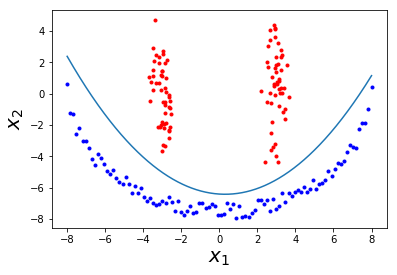

In [145]:
def cost(w):
    print(w)
    a, b, c = w
    ans = 0
    for dd, cc in zip(data,classes):
        x_1, y = dd
        if (cc == 1):  # eyes (red)
            if y >= (a*x_1**2)+b*x_1+c:
                pass
            else: 
                 ans += (((a*x_1**2)+b*x_1+c)-y)
        else: 
            if y >= (a*x_1**2)+b*x_1+c:
                 ans += (y - ((a*x_1**2)+b*x_1+c))
            else:
                pass
    return ans

plt.plot(data[classes==1,0], data[classes==1,1],'.r')
plt.plot(data[classes==0,0], data[classes==0,1],'.b')
plt.xlabel(r"$x_1$",size=20)
plt.ylabel(r"$x_2$",size=20)

dx = np.linspace(-8,8,1000)
res = scipy.optimize.minimize(cost,[1,1,-2])
a,b,c = res.x 
y = (a*dx**2)+b*dx+c
plt.plot(dx,y)

# plt.xlim(-20,20)
# plt.ylim(-20,20)

print("a:",a,"b:",b,"c:",c)

####4) Fitting a distribution.

A lot of time in science we go collect the data. For example you can measure the height of eveyone in MUIC. A good way to visualize it is to plot a histogram.

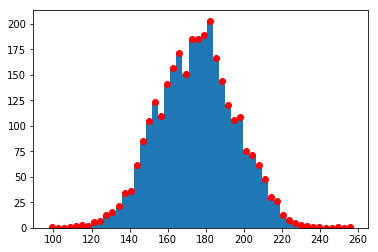

In [122]:
np.random.seed(78)
n = 3000
height = 175 + np.random.randn(n)*20
h, e, p = plt.hist(height, bins=50)
m = (e[1:] + e[:-1])/2.
bw = e[1]-e[0]
plt.plot(m,h,'or')
# print(h)

We can make it a probability distribution function(ensure the area=1) by number of data time bin width.


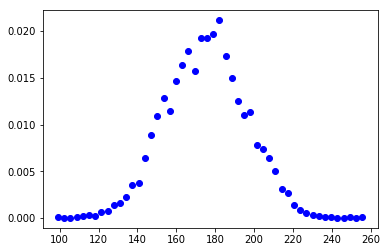

In [130]:
pdf = h/n/bw
plt.plot(m,pdf,'ob')


The probaility distribution Normal distribution is given by

$$P(x;\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{\displaystyle -\frac{(x-\mu)^2}{2\sigma^2}}$$

We would like to fit this against Normal distribution to find out the mean($\mu$) and the standard deviation($\sigma$).

####Your task

Figure out what to minimize and find the value of $\mu$ and $\sigma$ that gives us the best fit. The plot below show one decent guess.

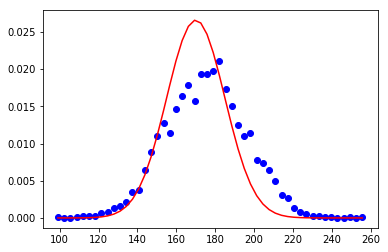

In [124]:
plt.plot(m,pdf,'ob')
plt.plot(m,1/(15*np.sqrt(2*math.pi))*np.exp(-(m-170)**2/(2*15**2)),'r')

[ 175.15009931   20.79617959]


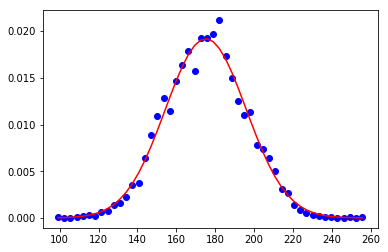

In [127]:
def cost(w):
    mu, sd = w
    return sum(((1/(sd*np.sqrt(2*np.pi))*np.exp(-(m-mu)**2/(2*sd**2))-pdf)**2))
res = scipy.optimize.minimize(cost,[200.,20.])
mu, sd = res.x 
print(res.x)

plt.plot(m,pdf,'ob')
plt.plot(m,1/(sd*np.sqrt(2*math.pi))*np.exp(-(m-mu)**2/(2*sd**2)),'r')

####5) Efficient Frontier.

This will be a long read. It's worth it. Even though you don't really need to fully understand the problem to do it, I recommend you Google/youtube the term if you don't fully understand. 

Constraint Optimization are usually difficult to deal with but some type of constraint is easier than others.
The form of constraint We want to deal with here is call linear equality constraint.

In this problem we will investigate the concept of Efficient Frontier and Captial Allocation Lines. This can really be used to make real money(given you have the right data). Do not forget about your AJ when you got rich :P.

Each stock has two characteristics. Mean rate of return $r$ and risk which is quantified by *variance*. For US stock you can actually look those up on yahoo finance, they give one estimate.

The mean reate of return $r$ tells you about the expected return of your investment. For example if you put money $m$ into a stock of mean rate of return $r$. Then you can expect it to be worth $m(1+r)$ at the end of the period.

If you invest in many stocks and the mean rate of return for each stocks are given by

$$\vec{R} = [r_0, r_1, r_2, \ldots]$$

and the fraction of total money you put in each stocks are ($w_0+w_1+\ldots = 1$)

$$\vec{w}= [w_0,w_1,w_2,\ldots]$$.

Then, the rate of return of your portfolio($\mu$) is given by

$$\mu = \vec{R} \cdot \vec{w}$$

Try it with 2 stock and you will understand where this comes from. See? I told you to pay attention in Math and Physics classes.

####Example 1.

If the rate of return for three stocks are given by 

$$\vec{R} = [0.01, 0.05,0.02]$$

and the fraction of the money you put is each stock is

$$\vec{w}= [0.5,0.4,0.1]$$

Find the expected rate of return of your portfolio.

In [250]:
#answer
R = [0.01,0.05,0.02]
w = [0.5,0.4,0.1]
print (np.dot(R,w))

0.027


The next thing to understand is the risk. This is quantified by the variance. Recall from Discrete Maht class the variance measures how wide spread the reate of return is. If the variance of 1 unit of stock A is $V(A)$ then the variance for holding $n$ unit of stock A is

$$V(10 A) = 10^2 V(A)$$

If we hold $w_A$ of stock A and and $w_B$ of stock B. Then the total risk/variance is given by

$$V(w_A A + w_B B) = w_A^2 V(A) + w_B^2 V(B) + 2 w_A w_B Cov(A,B) $$

where $Cov(A,B)$ is covariance of stock A and B. It measures whether the two stock goes up/down together(positive) of goes in opposite direction(negative) or doesn't care about each other(zero).

If you buy many stocks, then the same calculation can be carried out by

$$V_P = \vec{w} \cdot (\Sigma \vec{w})$$

where $V_P$ is variance/risk of your portfolio. The $\Sigma$ is called the covariance matrix. It is not the sum the second term is matrix multiplications.

In this problem, I'll give you the covariance matrix.

####Example 2
Given the covariance matrix of the 2 stocks as follows, and we invest
$\vec{w} = [0.2,0.8]$ in the two stocks. What is the covariance of your portfolio?

In [253]:
w = np.array([0.2,0.8])              #money 
cov = np.array([[1,0.5],[0.5,2]])
print ('covariance matrix') 
print (cov)

print ('Variance of portfolio')
covw = np.dot(cov,w)  
wcovw = np.dot(w,covw)
print (wcovw)

covariance matrix
[[ 1.   0.5]
 [ 0.5  2. ]]
Variance of portfolio
1.48


####Risk Tolerance.

When we try to make a portfolio, we would try to optimize some combination of risk and return. We want high return and low risk. However the two doesn't come together. We have to trade one off for another. One way to do that is to minimize some linear combination of risk and return

$$cost(\vec{w}) = \vec{w}\cdot\Sigma\vec{w}- q \vec{w}\cdot\vec{R}$$

For those people hate risk, value of $q$(risk tolerance) will be really small. Let us consider the extreme case where $q$ is zero. This mean the investor doesn't care what he/she gets in return. He/she only cares about the fact that the risk(first term) is minimize.

For risky investor, value of $q$ is really high. The cost function with high $q$ says that as long as the investor gets good return the risk is consider a small factor.

The question of making a portfolio is really the question of finding $\vec{w}$ such that the cost function is minimize. So, let us do that.

####Your task
Let us consider the market with 30 stocks. (I made up all these numbers. I think you can grab all these number for US stock from yahoo finance and quandl). The covarince matrix($S$) and the mean rate of return$R$ are given in the cell below. Your job is to find the best mean rate of return and the variance of the portfolio for various value of risk tolerance $q$. 

Do this for 30 values of ($q \in [0,0.8]$) then plot the variance of the optimal on $x$ axis and the mean rate of return for the portfolio on $y$ axis.  


Note that you will need to be a little smart about $\vec{w}$ since all the methods we know now can only do unconstrained optimization. But we do have a constrain in $\vec{w}$ that all the weights has to add up to 1. ($w$ can be negative indicating shorting the stock)

$$w_0+w_1+w_2+\ldots +w_{29}= 1$$

You will need to devise a way to get around that constraint.(Hint: Substitution)


Once you are done. Congratulation! you have just created an efficient frontier. 

See More:
https://www.youtube.com/watch?v=6I9-q2W4nwU

In [155]:
np.random.seed(121)
nstock = 30
R = np.random.randn(nstock)/100*2+0.01  #Rate of return  
A = np.random.randn(nstock,nstock)
S = np.dot(A,A.T)
S = S/np.max(np.abs(S))*5e-1            #cov matrix 
for i in range(S.shape[0]):          
    if abs(S[i,i])<1e-1:
        S[i,i] +=1e-1

In [156]:
print(S.shape)
print(R.shape)
# print(R)


(30, 30)
(30,)


In [ ]:
normalise = lambda W: W/np.sum(W)
return_rate = lambda W,R: np.dot(W, R)
variance = lambda W,S: np.dot(W, np.dot(S, W))

def cost(W,q): 
    norm_W = normalise(W)
    return variance(norm_W, S) - q * return_rate(norm_W, R)

q_list = np.linspace(0, 0.8, 30)
rate_of_return = []
var = []
for q in q_list:
    W = [1 for i in range(30)]
    W_best = scipy.optimize.minimize(cost, W, args=(q)).x
    rate_of_return.append(return_rate(W_best, R))
    var.append(variance(W_best, S))

plt.plot(var_list, ror_list)




(30,)
